# PyRoot

## Excersice 1

In [1]:
import sys
import ROOT, array
from math import *
import random
import math
import argparse




from ROOT import TRandom, TFile, TLorentzVector
from ROOT.std import vector
from array import array


Welcome to JupyROOT 6.10/04


In [2]:
s = ROOT.TChain("SystemTree")
s.Add("/home/tomas/Documentos/Plots/WP/*.root")
#t = ROOT.ExRootTreeReader(s)
ns= s.GetEntries()
#print(ns)
nbins= 150
nbins1_2= 50
nbins2= 40
nbins3= 100
nbins4 = 120
nbins5 = 110




In [3]:
def Histo(hs):                     #Function for The Histogram
    canvas = ROOT.TCanvas()
    hs.SetStats(0)
    canvas.cd()
    hs.Draw("pe")
    canvas.Draw()
    #canvas.SaveAs("/home/tomas/Documentos/Plots/WP/"+hs.GetName()+".png")
    
def DeltaPhi(phi1,phi2):           #Calculates Delta Phi between -pi and pi
    PHI=phi1-phi2
    if PHI >= pi:
        PHI -= 2*pi
    elif PHI < -1*pi:
        PHI += 2*pi
    return abs(PHI)


def DeltaPhi1(phi1,phi2):           #Calculates Delta Phi between -pi and pi without absolute value
    PHI=phi1-phi2
    if PHI >= pi:
        PHI -= 2*pi
    elif PHI < -1*pi:
        PHI += 2*pi
    return PHI



def DeltaEta(eta1,eta2):
    return eta1-eta2         #Calculates Delta Eta

def m_Tot(px1,py1,pt1,px2,py2,pt2,px3,py3,pt3):  #Calculates TotalMass from 5.4  https://arxiv.org/pdf/1709.07242.pdf 
    vec1 = [px1 , py1]
    vec2 = [px2 , py2]
    vec3 = [px3 , py3]
    norma1 = (vec1[0]**2+vec1[1]**2)**0.5
    norma2 = (vec2[0]**2+vec2[1]**2)**0.5
    norma3 = (vec3[0]**2+vec3[1]**2)**0.5
    return (((pt1+pt2+pt3)**2)+((norma1+norma2+norma3)**2))**0.5

def TransverseMass(pt1,pt2,phi):
    return (2*pt1*pt2*(1-cos(phi)))**0.5
    
def DeltaR(DeltaPhi,DeltaEta):
    return (DeltaPhi**2+DeltaEta**2)**0.5

In [4]:
#Creates the Canvas for the Histograms
h1PTB = ROOT.TH1F("h1PTB", "P_{T} (bJet)", nbins, 0.0, 600)
h1PTTau = ROOT.TH1F("h1PTTau", "P_{T} ($\Tau$)", nbins, 0.0, 1000)
h1PhiB = ROOT.TH1F("h1PhiB", "$\phi$ (bJet)", nbins, 0.0, 3.4)
h1PhiTau = ROOT.TH1F("h1PhiTau", "$\phi$ ($\Tau$)", nbins, 0.0, 3.4)
h1EtaB = ROOT.TH1F("h1EtaB", "$\eta$ (bJet)", nbins, 0.0, 5)
h1EtaTau = ROOT.TH1F("h1EtaTau", "$\eta (\Tau)$", nbins, 0.0, 5)
h1MET = ROOT.TH1F("h1MET", "MET", 200, 0.0, 1000)
h1METPhi = ROOT.TH1F("h1METPhi", "Met \phi", 200, 0.0, 3.2)
h2DeltaPhiMETTauB  = ROOT.TH2F("h2DeltaPhiMetTauB","\Delta \phi (bJet+MET)vs \Delta \phi ($\Tau$+MET)",
                               nbins,-pi,pi,nbins,-pi,pi)



h1PTBtau = ROOT.TH1F("h1biPTTauB", "P_{T} (bJet+$\Tau$)", nbins, 0.0, 1500)
h1PhiBTau = ROOT.TH1F("h1biPhiTauB", "$\Delta\phi$ (bJet+$\Tau$)", nbins, 0, 3.2)
h1EtaBTau = ROOT.TH1F("h1biEtaTauB", "$\Delta\eta$ (bJet+$\Tau$)", nbins, 0, 6)
hMTot_TauBMet = ROOT.TH1F("hMT_TauBMet", " m_{Tot} (bJet+$\Tau$+MET)", nbins, 0, 3000)
hMT_TauMet = ROOT.TH1F("hMT_TauMet", " m_{T} ($\Tau$+MET)", nbins, 0, 2000)
hMT_BMet = ROOT.TH1F("hMT_BMet", " m_{T} (bJet+MET)", nbins, 0, 1100)
h1biMass = ROOT.TH1F("h1biMass", " Ivariant_Mass (bJet+Tau)", nbins, 0, 100)
hDelR = ROOT.TH1F("hDelR", "$\Delta R$ ($\Tau$+b)", nbins,0,15)
hDelPhiBMet = ROOT.TH1F("h1PhiBMet", "$\Delta\phi$ (bJet+MET)", nbins, 0, 3.2)
hDelPhiTauMet = ROOT.TH1F("h1PhiTauMet", "$\Delta\phi$ ($\Tau$+MET)", nbins, 0, 3.2)


In [5]:

count1 = 0

for event in xrange(ns):
    s.GetEntry(event)
    jet1 = getattr(s, 'Jet1')            #Calls the Jet1 branch in the root file and name it jet1
    jet2 = getattr(s, 'Jet2')
    jet3 = getattr(s, 'Jet3')
    jet4 = getattr(s, 'Jet4')
    tagJet1B = getattr(s, 'b_Jet1Tag')   #Calls the b_Jet1Tag branch in the root file and name it tagJet1B
    tagJet2B = getattr(s, 'b_Jet2Tag')
    tagJet3B = getattr(s, 'b_Jet3Tag')
    tagJet4B = getattr(s, 'b_Jet4Tag')
    MissNRG_Phi = getattr(s, 'METPhi')
    MissNRG_T = getattr(s, 'METNRGT')
    MET_Eta = getattr(s, 'METEta')
    tagJet1Tau = getattr(s, 'Tau_Jet1Tag')
    tagJet2Tau = getattr(s, 'Tau_Jet2Tag')
    tagJet3Tau = getattr(s, 'Tau_Jet3Tag')
    tagJet4Tau = getattr(s, 'Tau_Jet4Tag')
    
    cond1 = (tagJet1B == 1 and tagJet2Tau == 1) #Condicional for the filter jet= b-quark, jet2 = Tau
    cond2 = (tagJet1B == 1 and tagJet3Tau == 1) #Condicional for the filter jet= b-quark, jet3 = Tau
    cond3 = (tagJet1B == 1 and tagJet4Tau == 1) #Condicional for the filter jet= b-quark, jet4 = Tau
    
    cond4 = (tagJet2B == 1 and tagJet1Tau == 1)
    cond5 = (tagJet2B == 1 and tagJet3Tau == 1)
    cond6 = (tagJet2B == 1 and tagJet4Tau == 1)
    
    cond7 = (tagJet3B == 1 and tagJet1Tau == 1)
    cond8 = (tagJet3B == 1 and tagJet2Tau == 1)
    cond9 = (tagJet3B == 1 and tagJet4Tau == 1)
    
    cond10 = (tagJet4B == 1 and tagJet1Tau == 1)
    cond11 = (tagJet4B == 1 and tagJet2Tau == 1)
    cond12 = (tagJet4B == 1 and tagJet3Tau == 1)
    
    condB = (tagJet1B == 1 or tagJet2B == 1 or tagJet3B == 1 or tagJet4B == 1)
    condTau = (tagJet1Tau == 1 or tagJet2Tau == 1 or tagJet3Tau == 1 or tagJet4Tau == 1)
    
    h1MET.Fill(MissNRG_T)
    h1METPhi.Fill(MissNRG_Phi)
    
    if tagJet1B == 1:
        jetb=jet1
        h1PTB.Fill(jetb.Pt())
        h1PhiB.Fill(jetb.Phi())
        if jetb.Eta()<2.4:
            h1EtaB.Fill(jetb.Eta())
    
    if tagJet2B == 1:
        jetb=jet2
        h1PTB.Fill(jetb.Pt())
        h1PhiB.Fill(jetb.Phi())
        if jetb.Eta()<2.4:
            h1EtaB.Fill(jetb.Eta())
    
    if tagJet3B == 1:
        jetb=jet3
        h1PTB.Fill(jetb.Pt())
        h1PhiB.Fill(jetb.Phi())
        if jetb.Eta()<2.4:
            h1EtaB.Fill(jetb.Eta())
            
    if tagJet4B == 1:
        jetb=jet2
        h1PTB.Fill(jetb.Pt())
        h1PhiB.Fill(jetb.Phi())
        if jetb.Eta()<2.4:
            h1EtaB.Fill(jetb.Eta())
        
        
        
    if tagJet1Tau == 1:
        jett=jet1
        h1PTTau.Fill(jett.Pt())
        h1PhiTau.Fill(jett.Phi())
        if jett.Eta()<2.4:
            h1EtaTau.Fill(jett.Eta())
    
    if tagJet2Tau == 1:
        jett=jet2
        h1PTTau.Fill(jett.Pt())
        h1PhiTau.Fill(jett.Phi())
        if jett.Eta()<2.4:
            h1EtaTau.Fill(jett.Eta())
    
    if tagJet3Tau == 1:
        jett=jet3
        h1PTTau.Fill(jett.Pt())
        h1PhiTau.Fill(jett.Phi())
        if jett.Eta()<2.4:
            h1EtaTau.Fill(jett.Eta())
            
    if tagJet4Tau == 1:
        jett=jet2
        h1PTTau.Fill(jett.Pt())
        h1PhiTau.Fill(jett.Phi())
        if jett.Eta()<2.4:
            h1EtaTau.Fill(jett.Eta())
        
    
    
    if cond1 :
        count1 =count1+1
        jetb=jet1
        jettau=jet2
        h1PTBtau.Fill(jetb.Pt()+jettau.Pt())
        h1PhiBTau.Fill(DeltaPhi(jetb.Phi(),jettau.Phi()))
        h1EtaBTau.Fill(DeltaEta(jetb.Eta(),jettau.Eta()))
        h1biMass.Fill(jetb.M()+jettau.M())
        hMTot_TauBMet.Fill(m_Tot(jetb.Px(),jetb.Py(),jetb.Pt(),jettau.Px(),jettau.Py(),jettau.Pt(),
                               MissNRG_T*math.cos(MissNRG_Phi),MissNRG_T*math.sin(MissNRG_Phi),MissNRG_T))
        hMT_TauMet.Fill(TransverseMass(jettau.Pt(),MissNRG_T,DeltaPhi(MissNRG_Phi,jettau.Phi())))
        hMT_BMet.Fill(TransverseMass(jetb.Pt(),MissNRG_T,DeltaPhi(MissNRG_Phi,jetb.Phi())))
        delta_R = DeltaR(DeltaPhi(jetb.Phi(),jettau.Phi()),DeltaEta(jetb.Eta(),jettau.Eta()))
        hDelR.Fill(delta_R)
        hDelPhiBMet.Fill(DeltaPhi(jetb.Phi(),MissNRG_Phi))
        hDelPhiTauMet.Fill((DeltaPhi(jettau.Phi(),MissNRG_Phi)))
        h2DeltaPhiMETTauB.Fill(DeltaPhi1(jetb.Phi(),MissNRG_Phi),DeltaPhi1(jettau.Phi(),MissNRG_Phi))
        
        
    if cond2 :
        count1 =count1+1
        jetb=jet1
        jettau=jet3
        h1PTBtau.Fill(jetb.Pt()+jettau.Pt())
        h1PhiBTau.Fill(DeltaPhi(jetb.Phi(),jettau.Phi()))
        h1EtaBTau.Fill(DeltaEta(jetb.Eta(),jettau.Eta()))
        h1biMass.Fill(jetb.M()+jettau.M())
        hMTot_TauBMet.Fill(m_Tot(jetb.Px(),jetb.Py(),jetb.Pt(),jettau.Px(),jettau.Py(),jettau.Pt(),
                               MissNRG_T*math.cos(MissNRG_Phi),MissNRG_T*math.sin(MissNRG_Phi),MissNRG_T))
        hMT_TauMet.Fill(TransverseMass(jettau.Pt(),MissNRG_T,DeltaPhi(MissNRG_Phi,jettau.Phi())))
        hMT_BMet.Fill(TransverseMass(jetb.Pt(),MissNRG_T,DeltaPhi(MissNRG_Phi,jetb.Phi())))
        delta_R = DeltaR(DeltaPhi(jetb.Phi(),jettau.Phi()),DeltaEta(jetb.Eta(),jettau.Eta()))
        hDelR.Fill(delta_R)
        hDelPhiBMet.Fill(DeltaPhi(jetb.Phi(),MissNRG_Phi))
        hDelPhiTauMet.Fill((DeltaPhi(jettau.Phi(),MissNRG_Phi)))
        h2DeltaPhiMETTauB.Fill(DeltaPhi1(jetb.Phi(),MissNRG_Phi),DeltaPhi1(jettau.Phi(),MissNRG_Phi))
        
        
    if cond3 :
        count1 =count1+1
        jetb=jet1
        jettau=jet4
        h1PTBtau.Fill(jetb.Pt()+jettau.Pt())
        h1PhiBTau.Fill(DeltaPhi(jetb.Phi(),jettau.Phi()))
        h1EtaBTau.Fill(DeltaEta(jetb.Eta(),jettau.Eta()))
        h1biMass.Fill(jetb.M()+jettau.M())
        hMTot_TauBMet.Fill(m_Tot(jetb.Px(),jetb.Py(),jetb.Pt(),jettau.Px(),jettau.Py(),jettau.Pt(),
                               MissNRG_T*math.cos(MissNRG_Phi),MissNRG_T*math.sin(MissNRG_Phi),MissNRG_T))
        hMT_TauMet.Fill(TransverseMass(jettau.Pt(),MissNRG_T,DeltaPhi(MissNRG_Phi,jettau.Phi())))
        hMT_BMet.Fill(TransverseMass(jetb.Pt(),MissNRG_T,DeltaPhi(MissNRG_Phi,jetb.Phi())))
        delta_R = DeltaR(DeltaPhi(jetb.Phi(),jettau.Phi()),DeltaEta(jetb.Eta(),jettau.Eta()))
        hDelR.Fill(delta_R)
        hDelPhiBMet.Fill(DeltaPhi(jetb.Phi(),MissNRG_Phi))
        hDelPhiTauMet.Fill((DeltaPhi(jettau.Phi(),MissNRG_Phi)))
        h2DeltaPhiMETTauB.Fill(DeltaPhi1(jetb.Phi(),MissNRG_Phi),DeltaPhi1(jettau.Phi(),MissNRG_Phi))
        
        
    if cond4 :
        count1 =count1+1
        jetb=jet2
        jettau=jet1
        h1PTBtau.Fill(jetb.Pt()+jettau.Pt())
        h1PhiBTau.Fill(DeltaPhi(jetb.Phi(),jettau.Phi()))
        h1EtaBTau.Fill(DeltaEta(jetb.Eta(),jettau.Eta()))
        h1biMass.Fill(jetb.M()+jettau.M())
        hMTot_TauBMet.Fill(m_Tot(jetb.Px(),jetb.Py(),jetb.Pt(),jettau.Px(),jettau.Py(),jettau.Pt(),
                               MissNRG_T*math.cos(MissNRG_Phi),MissNRG_T*math.sin(MissNRG_Phi),MissNRG_T))
        hMT_TauMet.Fill(TransverseMass(jettau.Pt(),MissNRG_T,DeltaPhi(MissNRG_Phi,jettau.Phi())))
        hMT_BMet.Fill(TransverseMass(jetb.Pt(),MissNRG_T,DeltaPhi(MissNRG_Phi,jetb.Phi())))
        delta_R = DeltaR(DeltaPhi(jetb.Phi(),jettau.Phi()),DeltaEta(jetb.Eta(),jettau.Eta()))
        hDelR.Fill(delta_R)
        hDelPhiBMet.Fill(DeltaPhi(jetb.Phi(),MissNRG_Phi))
        hDelPhiTauMet.Fill((DeltaPhi(jettau.Phi(),MissNRG_Phi)))
        h2DeltaPhiMETTauB.Fill(DeltaPhi1(jetb.Phi(),MissNRG_Phi),DeltaPhi1(jettau.Phi(),MissNRG_Phi))
        
        
    if cond5 :
        count1 =count1+1
        jetb=jet2
        jettau=jet3
        h1PTBtau.Fill(jetb.Pt()+jettau.Pt())
        h1PhiBTau.Fill(DeltaPhi(jetb.Phi(),jettau.Phi()))
        h1EtaBTau.Fill(DeltaEta(jetb.Eta(),jettau.Eta()))
        h1biMass.Fill(jetb.M()+jettau.M())
        hMTot_TauBMet.Fill(m_Tot(jetb.Px(),jetb.Py(),jetb.Pt(),jettau.Px(),jettau.Py(),jettau.Pt(),
                               MissNRG_T*math.cos(MissNRG_Phi),MissNRG_T*math.sin(MissNRG_Phi),MissNRG_T))
        hMT_TauMet.Fill(TransverseMass(jettau.Pt(),MissNRG_T,DeltaPhi(MissNRG_Phi,jettau.Phi())))
        hMT_BMet.Fill(TransverseMass(jetb.Pt(),MissNRG_T,DeltaPhi(MissNRG_Phi,jetb.Phi())))
        delta_R = DeltaR(DeltaPhi(jetb.Phi(),jettau.Phi()),DeltaEta(jetb.Eta(),jettau.Eta()))
        hDelR.Fill(delta_R)
        hDelPhiBMet.Fill(DeltaPhi(jetb.Phi(),MissNRG_Phi))
        hDelPhiTauMet.Fill((DeltaPhi(jettau.Phi(),MissNRG_Phi)))
        h2DeltaPhiMETTauB.Fill(DeltaPhi1(jetb.Phi(),MissNRG_Phi),DeltaPhi1(jettau.Phi(),MissNRG_Phi))
        
        
    if cond6 :
        count1 =count1+1
        jetb=jet2
        jettau=jet4
        h1PTBtau.Fill(jetb.Pt()+jettau.Pt())
        h1PhiBTau.Fill(DeltaPhi(jetb.Phi(),jettau.Phi()))
        h1EtaBTau.Fill(DeltaEta(jetb.Eta(),jettau.Eta()))
        h1biMass.Fill(jetb.M()+jettau.M())
        hMTot_TauBMet.Fill(m_Tot(jetb.Px(),jetb.Py(),jetb.Pt(),jettau.Px(),jettau.Py(),jettau.Pt(),
                               MissNRG_T*math.cos(MissNRG_Phi),MissNRG_T*math.sin(MissNRG_Phi),MissNRG_T))
        hMT_TauMet.Fill(TransverseMass(jettau.Pt(),MissNRG_T,DeltaPhi(MissNRG_Phi,jettau.Phi())))
        hMT_BMet.Fill(TransverseMass(jetb.Pt(),MissNRG_T,DeltaPhi(MissNRG_Phi,jetb.Phi())))
        delta_R = DeltaR(DeltaPhi(jetb.Phi(),jettau.Phi()),DeltaEta(jetb.Eta(),jettau.Eta()))
        hDelR.Fill(delta_R)
        hDelPhiBMet.Fill(DeltaPhi(jetb.Phi(),MissNRG_Phi))
        hDelPhiTauMet.Fill((DeltaPhi(jettau.Phi(),MissNRG_Phi)))
        h2DeltaPhiMETTauB.Fill(DeltaPhi1(jetb.Phi(),MissNRG_Phi),DeltaPhi1(jettau.Phi(),MissNRG_Phi))
        
        
    if cond7 :
        count1 =count1+1
        jetb=jet3
        jettau=jet1
        h1PTBtau.Fill(jetb.Pt()+jettau.Pt())
        h1PhiBTau.Fill(DeltaPhi(jetb.Phi(),jettau.Phi()))
        h1EtaBTau.Fill(DeltaEta(jetb.Eta(),jettau.Eta()))
        h1biMass.Fill(jetb.M()+jettau.M())
        hMTot_TauBMet.Fill(m_Tot(jetb.Px(),jetb.Py(),jetb.Pt(),jettau.Px(),jettau.Py(),jettau.Pt(),
                               MissNRG_T*math.cos(MissNRG_Phi),MissNRG_T*math.sin(MissNRG_Phi),MissNRG_T))
        hMT_TauMet.Fill(TransverseMass(jettau.Pt(),MissNRG_T,DeltaPhi(MissNRG_Phi,jettau.Phi())))
        hMT_BMet.Fill(TransverseMass(jetb.Pt(),MissNRG_T,DeltaPhi(MissNRG_Phi,jetb.Phi())))
        delta_R = DeltaR(DeltaPhi(jetb.Phi(),jettau.Phi()),DeltaEta(jetb.Eta(),jettau.Eta()))
        hDelR.Fill(delta_R)
        hDelPhiBMet.Fill(DeltaPhi(jetb.Phi(),MissNRG_Phi))
        hDelPhiTauMet.Fill((DeltaPhi(jettau.Phi(),MissNRG_Phi)))
        h2DeltaPhiMETTauB.Fill(DeltaPhi1(jetb.Phi(),MissNRG_Phi),DeltaPhi1(jettau.Phi(),MissNRG_Phi))
        
        
    if cond8 :
        count1 =count1+1
        jetb=jet3
        jettau=jet2
        h1PTBtau.Fill(jetb.Pt()+jettau.Pt())
        h1PhiBTau.Fill(DeltaPhi(jetb.Phi(),jettau.Phi()))
        h1EtaBTau.Fill(DeltaEta(jetb.Eta(),jettau.Eta()))
        h1biMass.Fill(jetb.M()+jettau.M())
        hMTot_TauBMet.Fill(m_Tot(jetb.Px(),jetb.Py(),jetb.Pt(),jettau.Px(),jettau.Py(),jettau.Pt(),
                               MissNRG_T*math.cos(MissNRG_Phi),MissNRG_T*math.sin(MissNRG_Phi),MissNRG_T))
        hMT_TauMet.Fill(TransverseMass(jettau.Pt(),MissNRG_T,DeltaPhi(MissNRG_Phi,jettau.Phi())))
        hMT_BMet.Fill(TransverseMass(jetb.Pt(),MissNRG_T,DeltaPhi(MissNRG_Phi,jetb.Phi())))
        delta_R = DeltaR(DeltaPhi(jetb.Phi(),jettau.Phi()),DeltaEta(jetb.Eta(),jettau.Eta()))
        hDelR.Fill(delta_R)
        hDelPhiBMet.Fill(DeltaPhi(jetb.Phi(),MissNRG_Phi))
        hDelPhiTauMet.Fill((DeltaPhi(jettau.Phi(),MissNRG_Phi)))
        h2DeltaPhiMETTauB.Fill(DeltaPhi1(jetb.Phi(),MissNRG_Phi),DeltaPhi1(jettau.Phi(),MissNRG_Phi))
        
        
    if cond9 :
        count1 =count1+1
        jetb=jet3
        jettau=jet4
        h1PTBtau.Fill(jetb.Pt()+jettau.Pt())
        h1PhiBTau.Fill(DeltaPhi(jetb.Phi(),jettau.Phi()))
        h1EtaBTau.Fill(DeltaEta(jetb.Eta(),jettau.Eta()))
        h1biMass.Fill(jetb.M()+jettau.M())
        hMTot_TauBMet.Fill(m_Tot(jetb.Px(),jetb.Py(),jetb.Pt(),jettau.Px(),jettau.Py(),jettau.Pt(),
                               MissNRG_T*math.cos(MissNRG_Phi),MissNRG_T*math.sin(MissNRG_Phi),MissNRG_T))
        hMT_TauMet.Fill(TransverseMass(jettau.Pt(),MissNRG_T,DeltaPhi(MissNRG_Phi,jettau.Phi())))
        hMT_BMet.Fill(TransverseMass(jetb.Pt(),MissNRG_T,DeltaPhi(MissNRG_Phi,jetb.Phi())))
        delta_R = DeltaR(DeltaPhi(jetb.Phi(),jettau.Phi()),DeltaEta(jetb.Eta(),jettau.Eta()))
        hDelR.Fill(delta_R)
        hDelPhiBMet.Fill(DeltaPhi(jetb.Phi(),MissNRG_Phi))
        hDelPhiTauMet.Fill((DeltaPhi(jettau.Phi(),MissNRG_Phi)))
        h2DeltaPhiMETTauB.Fill(DeltaPhi1(jetb.Phi(),MissNRG_Phi),DeltaPhi1(jettau.Phi(),MissNRG_Phi))
        
        
    if cond10 :
        count1 =count1+1
        jetb=jet4
        jettau=jet1
        h1PTBtau.Fill(jetb.Pt()+jettau.Pt())
        h1PhiBTau.Fill(DeltaPhi(jetb.Phi(),jettau.Phi()))
        h1EtaBTau.Fill(DeltaEta(jetb.Eta(),jettau.Eta()))
        h1biMass.Fill(jetb.M()+jettau.M())
        hMTot_TauBMet.Fill(m_Tot(jetb.Px(),jetb.Py(),jetb.Pt(),jettau.Px(),jettau.Py(),jettau.Pt(),
                               MissNRG_T*math.cos(MissNRG_Phi),MissNRG_T*math.sin(MissNRG_Phi),MissNRG_T))
        hMT_TauMet.Fill(TransverseMass(jettau.Pt(),MissNRG_T,DeltaPhi(MissNRG_Phi,jettau.Phi())))
        hMT_BMet.Fill(TransverseMass(jetb.Pt(),MissNRG_T,DeltaPhi(MissNRG_Phi,jetb.Phi())))
        delta_R = DeltaR(DeltaPhi(jetb.Phi(),jettau.Phi()),DeltaEta(jetb.Eta(),jettau.Eta()))
        hDelR.Fill(delta_R)
        hDelPhiBMet.Fill(DeltaPhi(jetb.Phi(),MissNRG_Phi))
        hDelPhiTauMet.Fill((DeltaPhi(jettau.Phi(),MissNRG_Phi)))
        h2DeltaPhiMETTauB.Fill(DeltaPhi1(jetb.Phi(),MissNRG_Phi),DeltaPhi1(jettau.Phi(),MissNRG_Phi))
        
        
    if cond11 :
        count1 =count1+1
        jetb=jet4
        jettau=jet2
        h1PTBtau.Fill(jetb.Pt()+jettau.Pt())
        h1PhiBTau.Fill(DeltaPhi(jetb.Phi(),jettau.Phi()))
        h1EtaBTau.Fill(DeltaEta(jetb.Eta(),jettau.Eta()))
        h1biMass.Fill(jetb.M()+jettau.M())
        hMTot_TauBMet.Fill(m_Tot(jetb.Px(),jetb.Py(),jetb.Pt(),jettau.Px(),jettau.Py(),jettau.Pt(),
                               MissNRG_T*math.cos(MissNRG_Phi),MissNRG_T*math.sin(MissNRG_Phi),MissNRG_T))
        hMT_TauMet.Fill(TransverseMass(jettau.Pt(),MissNRG_T,DeltaPhi(MissNRG_Phi,jettau.Phi())))
        hMT_BMet.Fill(TransverseMass(jetb.Pt(),MissNRG_T,DeltaPhi(MissNRG_Phi,jetb.Phi())))
        delta_R = DeltaR(DeltaPhi(jetb.Phi(),jettau.Phi()),DeltaEta(jetb.Eta(),jettau.Eta()))
        hDelR.Fill(delta_R)
        hDelPhiBMet.Fill(DeltaPhi(jetb.Phi(),MissNRG_Phi))
        hDelPhiTauMet.Fill((DeltaPhi(jettau.Phi(),MissNRG_Phi)))
        h2DeltaPhiMETTauB.Fill(DeltaPhi1(jetb.Phi(),MissNRG_Phi),DeltaPhi1(jettau.Phi(),MissNRG_Phi))
        
        
    if cond12 :
        count1 =count1+1
        jetb=jet4
        jettau=jet3
        h1PTBtau.Fill(jetb.Pt()+jettau.Pt())
        h1PhiBTau.Fill(DeltaPhi(jetb.Phi(),jettau.Phi()))
        h1EtaBTau.Fill(DeltaEta(jetb.Eta(),jettau.Eta()))
        h1biMass.Fill(jetb.M()+jettau.M())
        hMTot_TauBMet.Fill(m_Tot(jetb.Px(),jetb.Py(),jetb.Pt(),jettau.Px(),jettau.Py(),jettau.Pt(),
                               MissNRG_T*math.cos(MissNRG_Phi),MissNRG_T*math.sin(MissNRG_Phi),MissNRG_T))
        hMT_TauMet.Fill(TransverseMass(jettau.Pt(),MissNRG_T,DeltaPhi(MissNRG_Phi,jettau.Phi())))
        hMT_BMet.Fill(TransverseMass(jetb.Pt(),MissNRG_T,DeltaPhi(MissNRG_Phi,jetb.Phi())))
        delta_R = DeltaR(DeltaPhi(jetb.Phi(),jettau.Phi()),DeltaEta(jetb.Eta(),jettau.Eta()))
        hDelR.Fill(delta_R)
        hDelPhiBMet.Fill(DeltaPhi(jetb.Phi(),MissNRG_Phi))
        hDelPhiTauMet.Fill((DeltaPhi(jettau.Phi(),MissNRG_Phi)))
        h2DeltaPhiMETTauB.Fill(DeltaPhi1(jetb.Phi(),MissNRG_Phi),DeltaPhi1(jettau.Phi(),MissNRG_Phi))
        

print(sqrt(count1))

150.578882982


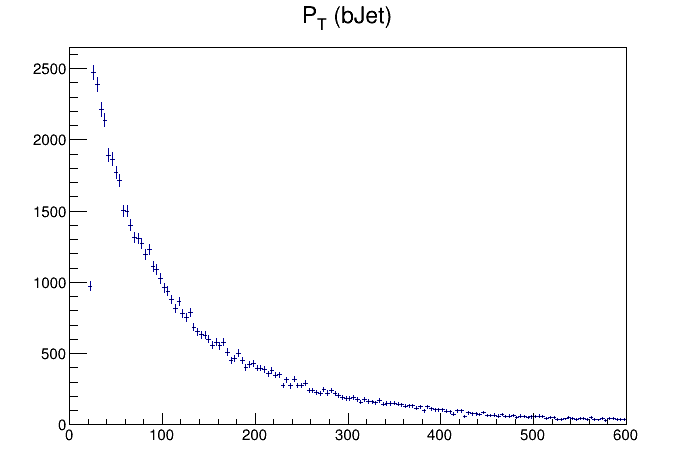

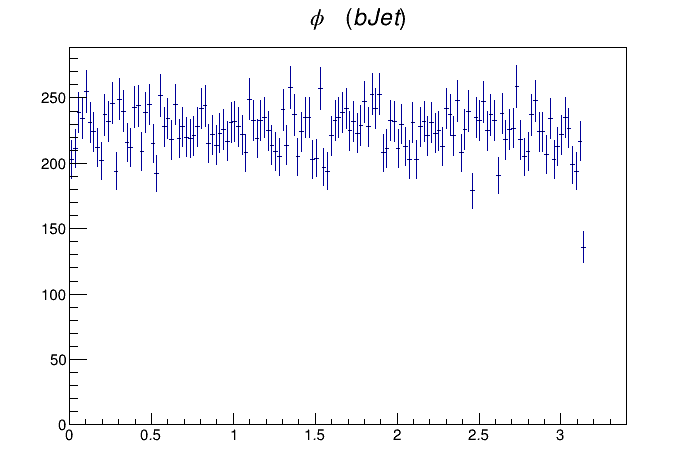

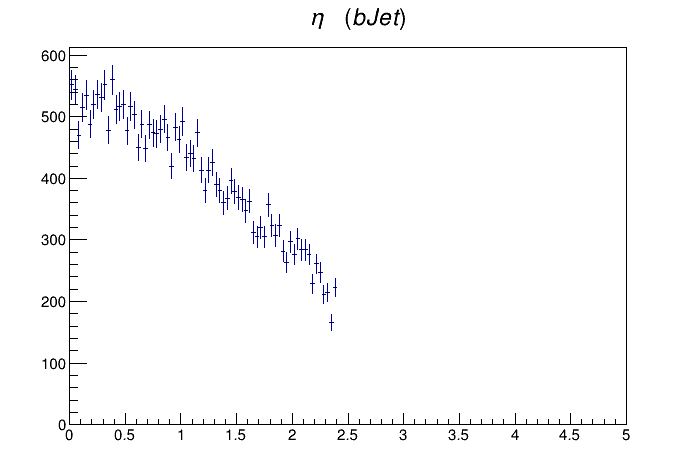

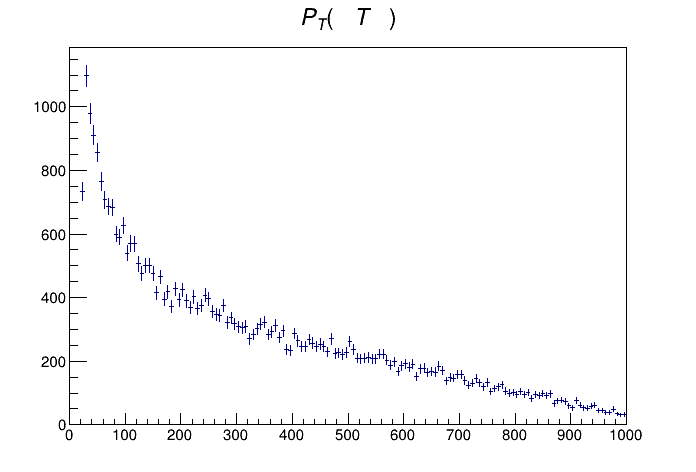

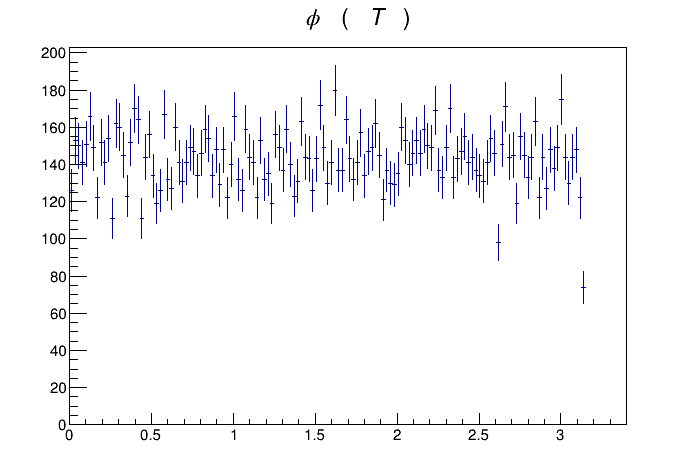

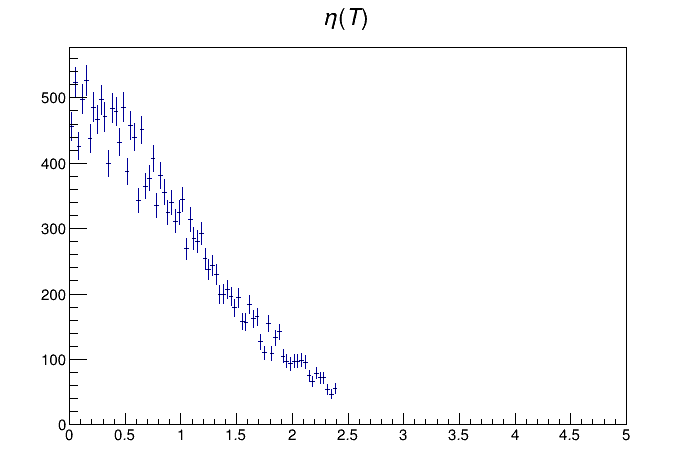

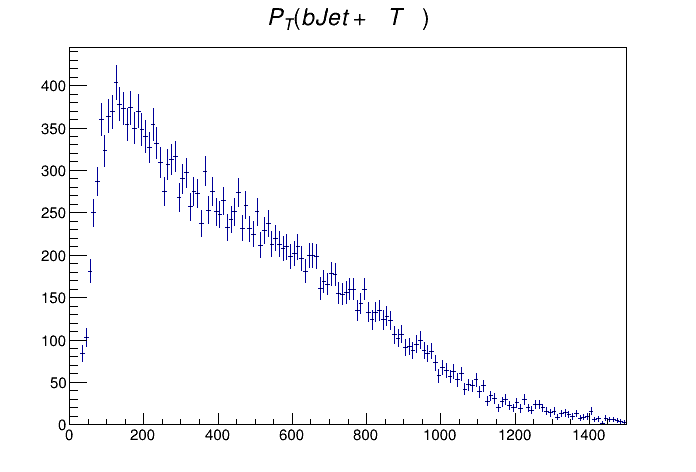

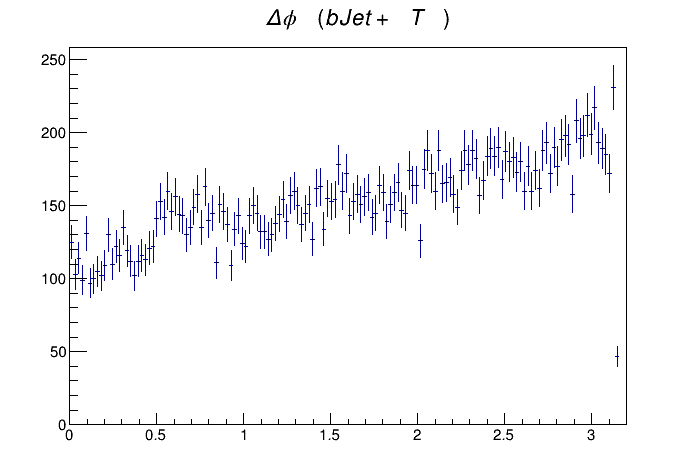

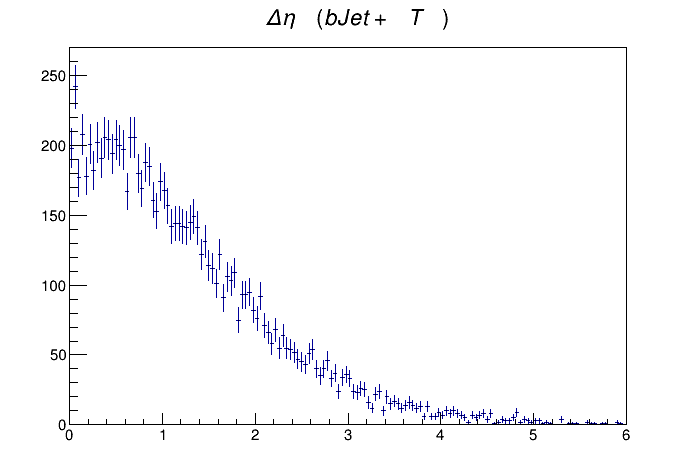

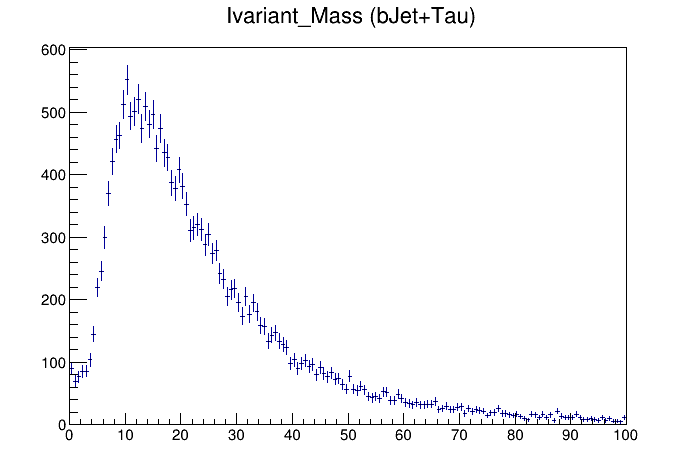

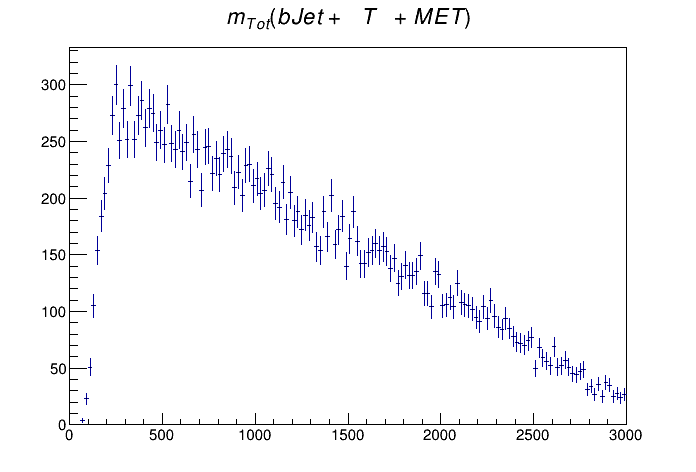

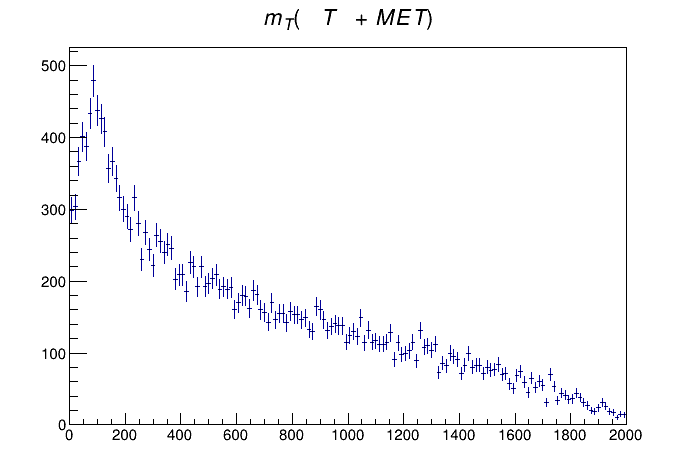

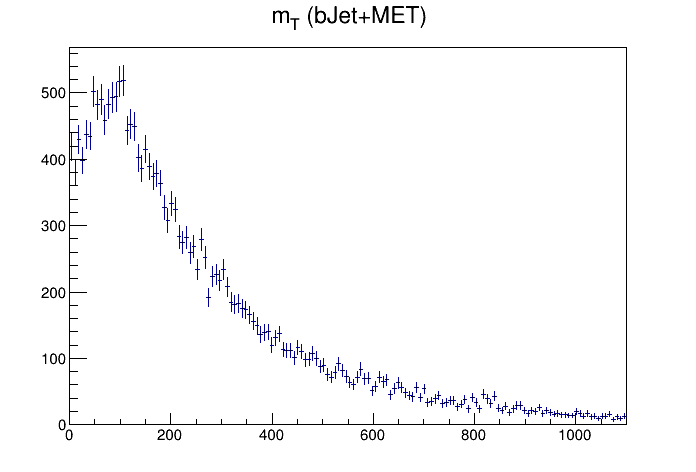

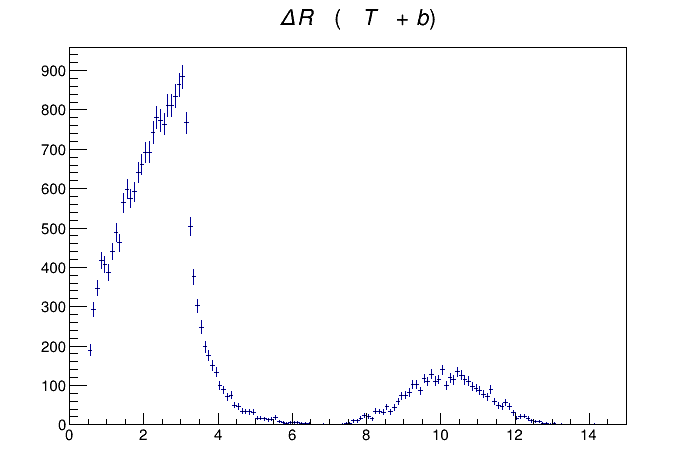

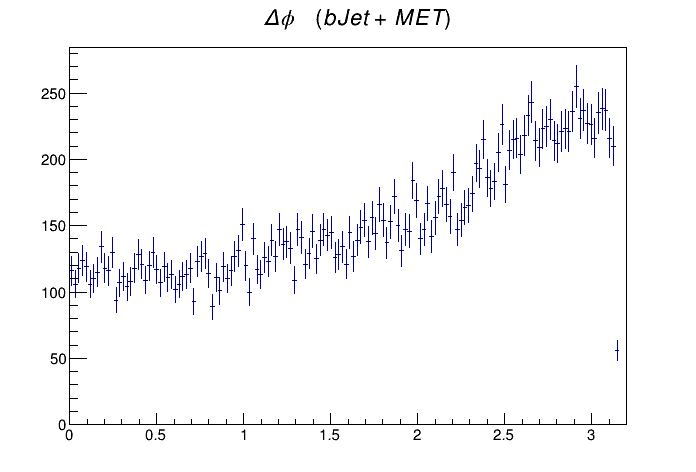

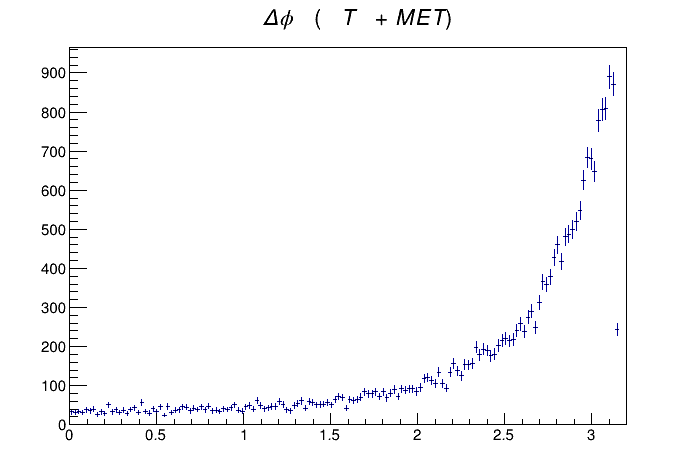

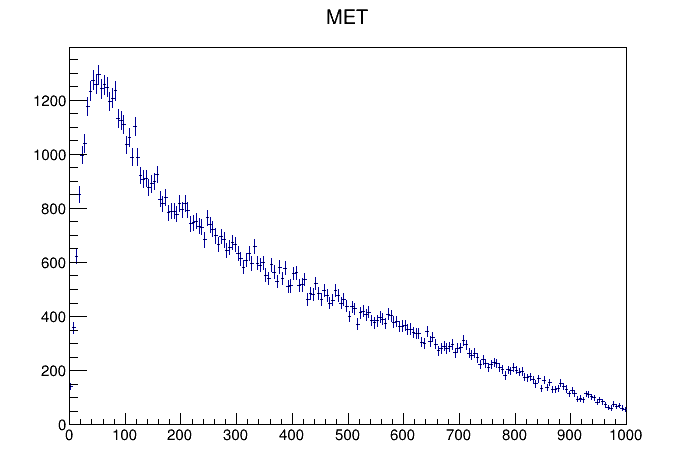

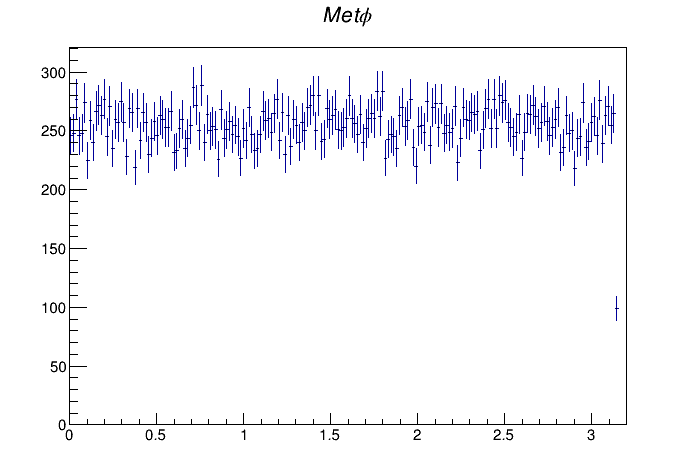

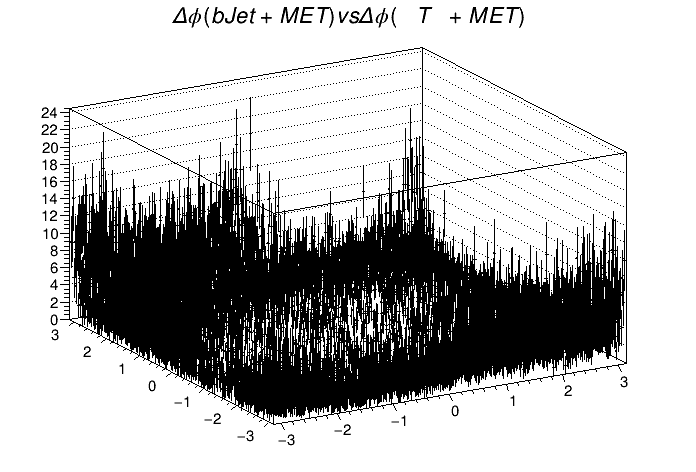

In [6]:
Histo(h1PTB)
Histo(h1PhiB)
Histo(h1EtaB)
Histo(h1PTTau)
Histo(h1PhiTau)
Histo(h1EtaTau)



Histo(h1PTBtau)
Histo(h1PhiBTau)
Histo(h1EtaBTau)
Histo(h1biMass)
Histo(hMTot_TauBMet)
Histo(hMT_TauMet)
Histo(hMT_BMet)
Histo(hDelR)
Histo(hDelPhiBMet)
Histo(hDelPhiTauMet)

Histo(h1MET)
Histo(h1METPhi)
Histo(h2DeltaPhiMETTauB)